In [100]:
## Loading packages
import pandas as pd
import numpy as np
#from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


import random
random.seed(10)

np.random.seed(42)


In [79]:
#read in the dataset
df = pd.read_csv("C:/Users/Dell/Desktop/Projects/Python/Machine learning/Data/diabetes_data.csv")

In [103]:
#take a look at the data
print(df.head())

#check dataset size
df.shape

# Feature names
feature_names = ['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin','bmi','dpf','age']

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  


#### Plotting correlation plot 

<Axes: >

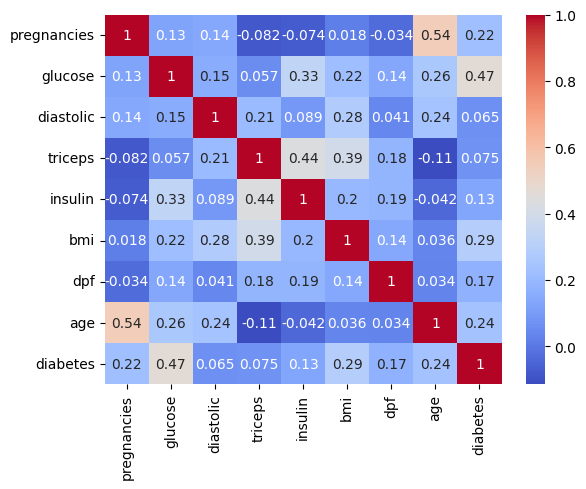

In [81]:
# df.corr()
sns.heatmap(df.corr(), annot=True, cmap='coolwarm') 

In [82]:
#split data into inputs and targets
X = df.drop(columns = ['diabetes'])
y = df['diabetes']


In [83]:
#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [98]:
model = LinearRegression()
model = LinearRegression().fit(X_train, y_train)

In [86]:
r_sq = model.score(X_train, y_train)
print(f"Linear regression Accuracy - R square: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")

### Adjusted r square
n = len(y_test)  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2 = 1 - (1 - r_sq) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adjusted_r2}")

Linear regression Accuracy - R square: 0.3057623024670906
intercept: -0.8969193436634028
coefficients: [ 2.28030921e-02  6.26498713e-03 -1.70045591e-03 -3.56955145e-04
 -1.15675104e-04  1.36321009e-02  1.20799814e-01  1.10088261e-03]
Adjusted R-squared: 0.28074472778121995


#### Caluculating variable importance

In [50]:
# Step 5: Create a DataFrame for better visualization
Coefficient = model.coef_

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})
df_sorted = coef_df.sort_values(by='Coefficient',ascending=False)
df_sorted

,Feature,Coefficient
6,dpf,0.172608
0,pregnancies,0.018472
5,bmi,0.014378
1,glucose,0.005441
7,age,0.002510
3,triceps,-0.000070
4,insulin,-0.000205
2,diastolic,-0.001817


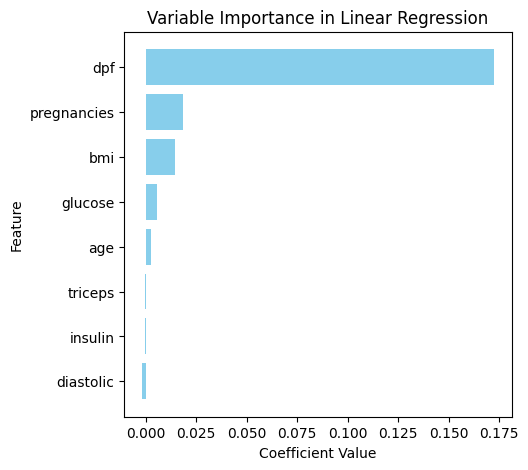

In [106]:
# Step 6: Plot the variable importance
plt.figure(figsize=(5, 5))
plt.barh(df_sorted['Feature'], df_sorted['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Variable Importance in Linear Regression')
plt.gca().invert_yaxis()
plt.show()

#### Check whether the model is overfitted

In [102]:
# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate performance
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Training R-squared: {train_r2}")
print(f"Testing R-squared: {test_r2}")
print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")


Training R-squared: 0.3057623024670906
Testing R-squared: 0.2892946474120145
Training MSE: 0.15756845327871208
Testing MSE: 0.16182361713506166


In [93]:
## Create a new dataset with important columns only
#x1 = X_train[['pregnancies','glucose','bmi','dpf','triceps']]
x1 = X_train[['bmi','glucose','age','pregnancies']]

In [94]:
model = LinearRegression().fit(x1, y_train)

In [95]:
r_sq = model.score(x1, y_train)
print(f"Linear regression Accuracy - R square: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")

### Adjusted r square
n = len(y_test)  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2 = 1 - (1 - r_sq) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adjusted_r2}")

Linear regression Accuracy - R square: 0.29417005341715907
intercept: -0.9232501104687459
coefficients: [0.01264297 0.00621491 0.00081983 0.02221359]
Adjusted R-squared: 0.26873474002678643
